In [27]:
from auxiliary_functions import * 

# Step 1: Creating a Pandapower network from OpenStreetMap

Now, we can use our helper functions to easily create a network. We will show 4 different ways to query OSM, but we will only use the first one (by city) for the rest of the tutorial.



## Example 1: This is the simplest way. Just provide a city and country.

In [ ]:
# Our main example
query_city = "Guaraçai, Brazil"
net, tree_graph = create_osm_pandapower_network(query_city, query_type='city')

# Keep these for the next steps
source_bus = net.ext_grid.bus.iloc[0] # This will be 0
graph_from_net = pn.create_nxgraph(net)

print(f"\nCreated network for {query_city}.")
print(net)

Fetching graph for query 'Guaraçai, Brazil' (type: city)...
No substation_point provided. Finding graph center...
Using graph center: (-21.0402, -51.2241)
Substation node selected: 353411112
Radializing graph from source node 353411112...
Original graph: 459 nodes, 689 edges
Radial tree: 459 nodes, 458 edges
Converting NetworkX graph to pandapower network...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Created 459 buses.
Created 458 lines.
Added External Grid at bus 0 (Node 353411112).

--- OSM pandapower network creation complete! ---

Created network for Guaraçai, Brazil.
This pandapower network includes the following parameter tables:
   - bus (459 elements)
   - ext_grid (1 element)
   - line (458 elements)


## Example 2: By Point + Radius
Useful for modeling a specific neighborhood.

In [5]:
# A point in Santo Amaro, São Paulo
query_point = (-23.649, -46.702) 

# We can specify a different line type for this network
net_point, _ = create_osm_pandapower_network(
    query_point, 
    query_type='point', 
    dist=1500, # 1500-meter radius
    line_std_type="48-AL1/8-ST1A 20.0" # Example of a different standard
)
print(net_point)

Fetching graph for query '(-23.649, -46.702)' (type: point)...
No substation_point provided. Finding graph center...
Using graph center: (-23.6488, -46.7023)
Substation node selected: 2380734697
Radializing graph from source node 2380734697...
Original graph: 951 nodes, 1422 edges
Radial tree: 951 nodes, 950 edges
Converting NetworkX graph to pandapower network...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Created 951 buses.
Created 950 lines.
Added External Grid at bus 0 (Node 2380734697).

--- OSM pandapower network creation complete! ---
This pandapower network includes the following parameter tables:
   - bus (951 elements)
   - ext_grid (1 element)
   - line (950 elements)


## Example 3: By Bounding Box
Useful if you have exact map coordinates.

In [3]:
# A small bounding box in New York City
query_bbox = {
    'north': 40.715, 'south': 40.710,
    'east': -74.005, 'west': -74.010
}
net_bbox, _ = create_osm_pandapower_network(query_bbox, query_type='bbox')
print(net_bbox)

Fetching graph for query '{'north': 40.715, 'south': 40.71, 'east': -74.005, 'west': -74.01}' (type: bbox)...
No substation_point provided. Finding graph center...
Using graph center: (40.7122, -74.0077)
Substation node selected: 2821304138
Radializing graph from source node 2821304138...
Original graph: 30 nodes, 40 edges
Radial tree: 30 nodes, 29 edges
Converting NetworkX graph to pandapower network...
Created 30 buses.
Created 29 lines.
Added External Grid at bus 0 (Node 2821304138).

--- OSM pandapower network creation complete! ---
This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - ext_grid (1 element)
   - line (29 elements)


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Example 4: By Address
Combines geocoding (finding coordinates) with the point query.

In [28]:
query_address = "São Carlos City Center, Brazil"
net_address, _ = create_osm_pandapower_network(
    query_address, 
    query_type='address', 
    dist=100 # 100-meter radius around the address
)
print(net_address)

Fetching graph for query 'São Carlos City Center, Brazil' (type: address)...
No substation_point provided. Finding graph center...
Using graph center: (-22.0676, -46.9741)
Substation node selected: 1850349272
Radializing graph from source node 1850349272...
Original graph: 6 nodes, 7 edges
Radial tree: 6 nodes, 5 edges
Converting NetworkX graph to pandapower network...
Created 6 buses.
Created 5 lines.
Added External Grid at bus 0 (Node 1850349272).

--- OSM pandapower network creation complete! ---
This pandapower network includes the following parameter tables:
   - bus (6 elements)
   - ext_grid (1 element)
   - line (5 elements)


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Step 2: Visualize the Radial Network
Let's plot the tree_graph we created for São Carlos to see what our new network topology looks like.

Plotting the radial 'São Carlos' network...
OSM-based radial network topology:


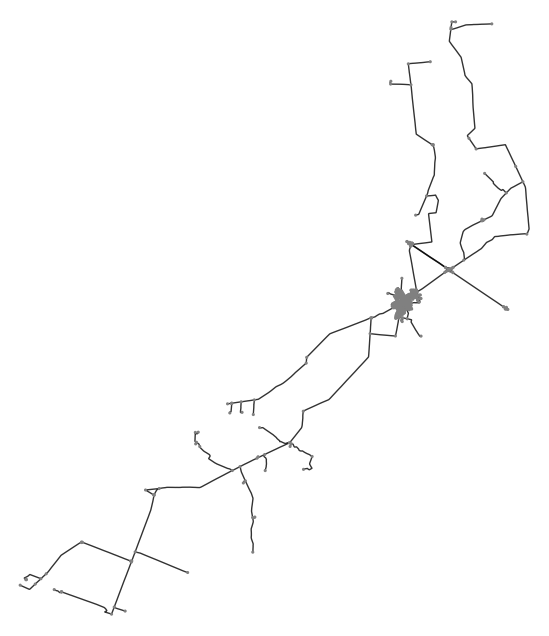

In [30]:
print("Plotting the radial 'São Carlos' network...")
substation_node = net.bus.name.iloc[source_bus] # Get original osmnx node ID

# --- 1. Prepare Node Colors and Sizes ---
node_colors = []
node_sizes = []
for node in tree_graph.nodes():
    if str(node) == substation_node:
        node_colors.append('red')   # Highlight color for the substation
        node_sizes.append(100)      # Make it larger
    else:
        node_colors.append('gray')  # Color for other nodes
        node_sizes.append(5)        # Make other nodes small

# --- 2. Create and Customize the Plot ---
fig, ax = ox.plot_graph(
    tree_graph,
    node_color=node_colors,
    node_size=node_sizes,
    node_zorder=2,
    edge_color='black',
    edge_linewidth=1.0,
    edge_alpha=0.8,
    bgcolor='white',
    show=False,
    close=False
)

print("OSM-based radial network topology:")
plt.show()

# Step 3: setup and initialize BHM

* Please be aware: in the background, the traces from the bayesian models are being loaded. This may take some time.

* You can define the total demand for the power model, if you want. This will be the total active power (in kW) to be splitted across the buses.

In [11]:
# --- Set global generation parameters ---
RANDOM_SEED = 42
N_SAMPLES_TO_GENERATE = 100 # We will generate 100 synthetic network samples
OUTPUT_FOLDER = 'new_osm_synthetic_net' # Folder to save our results

# 1. Power & Phase Model
# We set total_demand=None to not rescale the output
bhm = BayesianPowerModel(total_demand=1e3) # 1 GW of total demand

# 2. Frequency Model
bfm = BayesianFrequencyModel()

# 3. Duration Model
bdm = BayesianDurationModel()

# 4. Impedance Model (R and X)
bim = BayesianImpedanceModel()

Loading trace from traces/power_and_phase_allocation/trace.pickle...
Successfully loaded pre-trained model.
Model was trained with 3599 buses and 10 zones.
Loading trace from traces/failure_frequency_fic/trace.nc...
Successfully loaded pre-trained model.
Model was trained with 9328 buses and 30 zones.
Loading trace from traces/failure_duration_dic/trace.nc...
Successfully loaded pre-trained model.
Model was trained with 13547 total buses
(8299 positive) and 30 zones.
Loading R1 trace from traces/impedance_r_and_x/trace_r.nc...
R1 model loaded. Trained with 10353 lines and 10 zones.
Loading X1 trace from traces/impedance_r_and_x/trace_x.nc...
X1 model loaded. Trained with 10353 lines and 10 zones.


# Step 4: Calculate Hop & Electrical Distances


We use the net and graph_from_net objects (which we created in Step 2 from OSM data) to calculate the hop distance zones.

In [12]:
print("Calculating hop distances for all buses in the OSM network...")

# --- 1. Calculate Hop Distance for all buses ---
hop_distances_new_net = {}
for bus_idx in net.bus.index:
    try:
        dist = nx.shortest_path_length(graph_from_net, source=source_bus, target=bus_idx)
        hop_distances_new_net[bus_idx] = dist
    except (nx.NetworkXNoPath, nx.NodeNotFound):
        hop_distances_new_net[bus_idx] = np.nan

hop_series = pd.Series(hop_distances_new_net, index=net.bus.index)
max_dist = hop_series.max()
hop_series = hop_series.fillna(max_dist)
print(f"Max hop distance found: {max_dist}")

# --- 2. Discretize Bus Hop Distances for RELIABILITY (30 Bins) ---
N_BINS_RELIABILITY = 30
hop_zone_idx_reliability = pd.cut(
    hop_series, bins=N_BINS_RELIABILITY, labels=False, include_lowest=True
).values
print(f"Created {len(hop_zone_idx_reliability)} bus zone indices for reliability (30 bins).")

# --- 3. Discretize Bus Hop Distances for POWER (10 Bins) ---
N_BINS_POWER_IMPD = 10
hop_zone_series_power = pd.cut(
    hop_series, bins=N_BINS_POWER_IMPD, labels=False, include_lowest=True
)
hop_zone_idx_power = hop_zone_series_power.values
print(f"Created {len(hop_zone_idx_power)} bus zone indices for power (10 bins).")

# --- 4. Discretize LINE Electrical Distances (10 Bins) ---
from_buses = net.line.from_bus
line_elec_dist_idx = hop_zone_series_power.loc[from_buses].values
print(f"Created {len(line_elec_dist_idx)} line zone indices for impedance (10 bins).")

Calculating hop distances for all buses in the OSM network...
Max hop distance found: 39
Created 459 bus zone indices for reliability (30 bins).
Created 459 bus zone indices for power (10 bins).
Created 458 line zone indices for impedance (10 bins).


# Step 5: Generate All Synthetic Data
We now feed our new OSM-based zone indices into the models. The models don't care where the zones came from, only that they are provided.



In [13]:
print("--- Starting Synthetic Data Generation ---")

# --- 1. Generate Power & Phase ---
print("\nGenerating Power and Phase...")
gen_phases, gen_power = bhm.generate_consistent_data(
    new_hop_zone_idx=hop_zone_idx_power,
    graph=graph_from_net,
    source_bus_idx=source_bus,
    scan_draws=N_SAMPLES_TO_GENERATE,
    random_seed=RANDOM_SEED
)
print(f"Power/Phase shape: {gen_power.shape}")

# --- 2. Generate Failure Frequency ---
print("\nGenerating Failure Frequency (CAIFI/FIC)...")
gen_freq_all = bfm.generate_data(
    new_hop_zone_idx=hop_zone_idx_reliability, random_seed=RANDOM_SEED
)
gen_freq = gen_freq_all[:N_SAMPLES_TO_GENERATE, :]
print(f"Frequency shape: {gen_freq.shape}")

# --- 3. Generate Failure Duration ---
print("\nGenerating Failure Duration (CAIDI/DIC)...")
gen_dur_all = bdm.generate_data(
    new_hop_zone_idx=hop_zone_idx_reliability, random_seed=RANDOM_SEED
)
gen_dur = gen_dur_all[:N_SAMPLES_TO_GENERATE, :]
print(f"Duration shape: {gen_dur.shape}")

# --- 4. Generate R1 and X1 Impedance ---
print("\nGenerating Line Impedance (R1/X1)...")
gen_r_all, gen_x_all = bim.generate_data(
    new_elec_dist_idx=line_elec_dist_idx, random_seed=RANDOM_SEED
)
gen_r = gen_r_all[:N_SAMPLES_TO_GENERATE, :]
gen_x = gen_x_all[:N_SAMPLES_TO_GENERATE, :]
print(f"R1 shape: {gen_r.shape}, X1 shape: {gen_x.shape}")

print("\n--- All Generation Complete ---")

--- Starting Synthetic Data Generation ---

Generating Power and Phase...
Step 1: Generating unconstrained data for 459 buses...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [phase_likelihood, power_observed, probs]


Output()

Step 1 complete.
Step 2: Calculating phase probabilities...
Step 2a: Analyzing graph topology...
Found 273 ramification nodes.
Step 3: Building graph-consistency scan model for 273 ramification nodes...


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 0 tune and 100 draw iterations (0 + 400 draws total) took 87 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Step 5: Mapping consistent phases to full grid...
--- Generation Complete ---
Step 6: Re-allocating power based on consistent phases...
--- Generation Complete ---
Power/Phase shape: (400, 459, 3)

Generating Failure Frequency (CAIFI/FIC)...
New network is smaller or same size. Using padding...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [frequency_likelihood]


Output()

c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [observed_hurdle]


Output()


--- Simulation Complete ---
Shape of final samples: (4000, 459)
Frequency shape: (100, 459)

Generating Failure Duration (CAIDI/DIC)...

--- Part 1: Predicting the Hurdle for 459 buses ---
New network is smaller or same size. Using padding...



--- Part 2: Generating Potential Positive Durations ---

--- Part 3: Combining Hurdle and Duration Samples ---

--- Simulation Complete ---
Shape of final samples: (4000, 459)
Duration shape: (100, 459)

Generating Line Impedance (R1/X1)...
Generating R1 samples for 458 lines...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [r1_likelihood]


Output()

Generating X1 samples for 458 lines...


c:\Users\hoc\anaconda3\envs\lps\Lib\site-packages\pymc\data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [x1_likelihood]


Output()


--- Simulation Complete ---
R1 samples shape: (4000, 458)
X1 samples shape: (4000, 458)
R1 shape: (100, 458), X1 shape: (100, 458)

--- All Generation Complete ---


# Step 6: Post-Process and Save All Samples
Finally, we save all N_SAMPLES_TO_GENERATE into our new output folder, new_osm_synthetic_net.

In [25]:
gen_power = gen_power[:N_SAMPLES_TO_GENERATE, :, :]

gen_phases = gen_phases[:N_SAMPLES_TO_GENERATE, :]

gen_freq = gen_freq[:N_SAMPLES_TO_GENERATE, :]

gen_dur = gen_dur[:N_SAMPLES_TO_GENERATE, :]

gen_r = gen_r[:N_SAMPLES_TO_GENERATE, :]

gen_x = gen_x[:N_SAMPLES_TO_GENERATE, :]

In [26]:
print(f"Processing all {N_SAMPLES_TO_GENERATE} samples and saving to folder: '{OUTPUT_FOLDER}'")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 1. Save Power and Phase
save_power_phase_samples(
    gen_phases=gen_phases,
    gen_power=gen_power,
    bus_index=net.bus.index,
    phase_map=bhm.get_phase_map(),
    n_samples=N_SAMPLES_TO_GENERATE,
    output_path=os.path.join(OUTPUT_FOLDER, 'bus_power_and_phase_SAMPLES.csv')
)

# 2. Save Frequency
save_bus_metric_samples(
    gen_data=gen_freq,
    col_name='CAIFI_FIC',
    bus_index=net.bus.index,
    n_samples=N_SAMPLES_TO_GENERATE,
    output_path=os.path.join(OUTPUT_FOLDER, 'bus_frequency_SAMPLES.csv')
)

# 3. Save Duration
save_bus_metric_samples(
    gen_data=gen_dur,
    col_name='CAIDI_DIC',
    bus_index=net.bus.index,
    n_samples=N_SAMPLES_TO_GENERATE,
    output_path=os.path.join(OUTPUT_FOLDER, 'bus_duration_SAMPLES.csv')
)

# 4. Save Impedance
save_impedance_samples(
    gen_r=gen_r,
    gen_x=gen_x,
    line_index=net.line.index,
    n_samples=N_SAMPLES_TO_GENERATE,
    output_path=os.path.join(OUTPUT_FOLDER, 'line_impedance_SAMPLES.csv')
)

print("\n--- All Synthetic Data Samples Saved Successfully! ---")

Processing all 100 samples and saving to folder: 'new_osm_synthetic_net'
Processing Power & Phase...
Saved 'bus_power_and_phase_SAMPLES.csv' with 45900 rows.
Processing CAIFI_FIC...
Saved 'bus_frequency_SAMPLES.csv' with 45900 rows.
Processing CAIDI_DIC...
Saved 'bus_duration_SAMPLES.csv' with 45900 rows.
Processing Impedance...
Saved 'line_impedance_SAMPLES.csv' with 45800 rows.

--- All Synthetic Data Samples Saved Successfully! ---


# Tutorial Complete
You have successfully started from a simple OpenStreetMap query (address, bounding box, point location, city name); downloaded real-world map data;  converted it into a radial pandapower network, and generated a full set of N_SAMPLES_TO_GENERATE synthetic parameters for it.